# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [4]:
df_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [8]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [18]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.4. `df_data` に欠損値がないかを確認しましょう。

In [20]:
df_data1 = df_data.isna().sum()
print(df_data1)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [23]:
print(df_target.sample(10))

     target
71        1
79        1
96        1
81        1
32        0
50        1
132       2
129       2
78        1
37        0


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

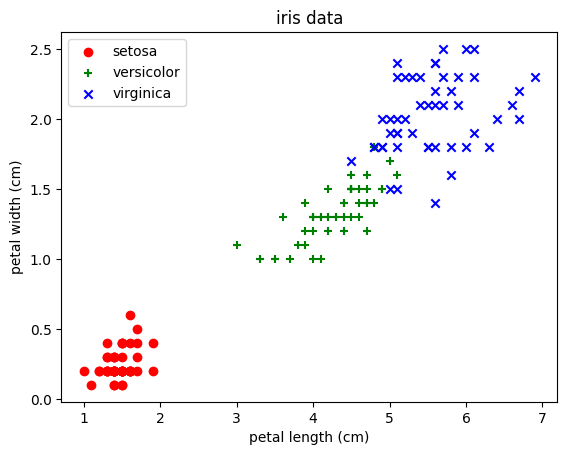

In [31]:
import matplotlib.pyplot as plt
setosa, versicolor, virginica = df_data[df_target['target'] == 0], df_data[df_target['target'] == 1], df_data[df_target['target'] == 2]
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], color='red', label='setosa')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], marker = "+", color='green', label='versicolor')
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], marker = "x", color='blue', label='virginica')
plt.title('iris data')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')  
plt.show()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [42]:
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (120, 4)
x_test : (30, 4)
y_train : (120, 1)
y_test : (30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [44]:
from sklearn.ensemble import RandomForestClassifier
rodom_forest_model = RandomForestClassifier()

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [45]:
rodom_forest_model.fit(x_train, y_train)

c:\Users\Hiroto\anaconda3\envs\PG-Basic-Python\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [51]:
result_predict = rodom_forest_model.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [52]:
accuracy = rodom_forest_model.score(x_test, y_test)
print(accuracy)

0.9666666666666667


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。